## Housing Case Study
Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [57]:
#1 Import the dataset (Housing.csv) and look at the top five rows
import pandas as pd
df = pd.read_csv('Housing.csv')
print(df.head(5))

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [58]:
#2 Check the shape of the DataFrame (rows, columns)
import pandas as pd
df=pd.read_csv('Housing.csv')
print(df.shape[0])
print(df.shape[1])

545
13


In [59]:
#3 Look at the data types of the columns
import pandas as pd
df=pd.read_csv('Housing.csv')
print(df.dtypes)

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [60]:
#4 Check for missing  values if any, replace with appropriate values

import pandas as pd
df=pd.read_csv('Housing.csv')
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [61]:
#5 Prepare  X (independent variables) and y (dependent variabe)
X = df.drop(columns=['price'])  # Assuming 'price' is the dependent variable
y = df['price']

print(X.head())  # Display first few rows of X
print(y.head())  # Display first few rows of y




   area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  7420         4          2        3      yes        no       no   
1  8960         4          4        4      yes        no       no   
2  9960         3          2        2      yes        no      yes   
3  7500         4          2        2      yes        no      yes   
4  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64


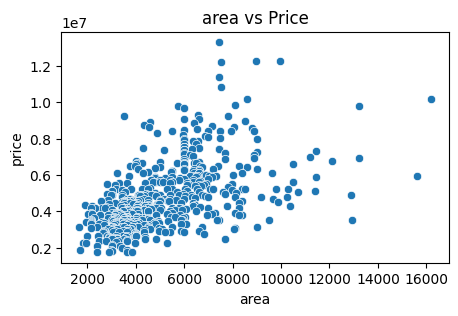

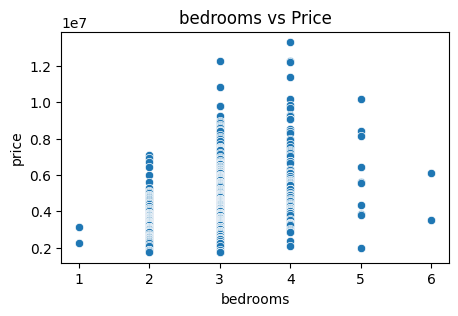

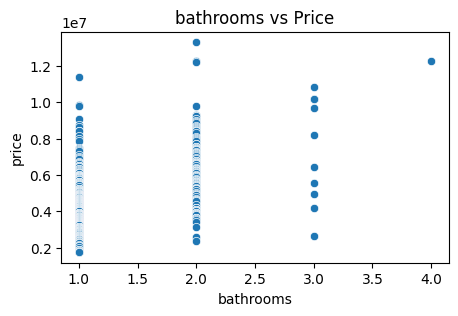

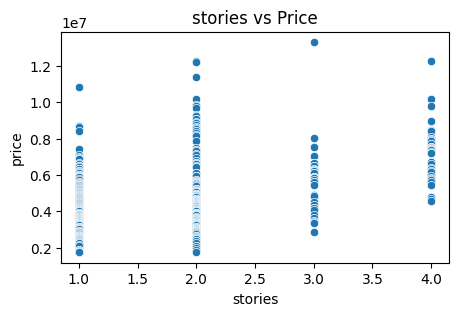

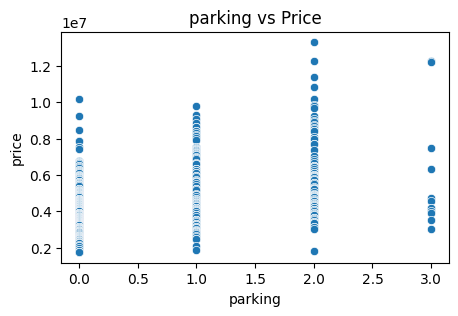

In [62]:
#6 Visualise the relationship between the independent variables and the depenedent variable using scatterplots
import matplotlib.pyplot as plt
import seaborn as sns

for col in X.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(5,3))
    sns.scatterplot(x=df[col],y=y)
    plt.title(f'{col} vs Price')
    plt.show()


In [63]:
#7 Encoding categorical data in X

X = pd.get_dummies(X)

print(X.head())  # Show transformed X


   area  bedrooms  bathrooms  stories  parking  mainroad_no  mainroad_yes  \
0  7420         4          2        3        2        False          True   
1  8960         4          4        4        3        False          True   
2  9960         3          2        2        2        False          True   
3  7500         4          2        2        3        False          True   
4  7420         4          1        2        2        False          True   

   guestroom_no  guestroom_yes  basement_no  basement_yes  hotwaterheating_no  \
0          True          False         True         False                True   
1          True          False         True         False                True   
2          True          False        False          True                True   
3          True          False        False          True                True   
4         False           True        False          True                True   

   hotwaterheating_yes  airconditioning_no  aircon

In [64]:
#8  Avoiding the Dummy Variable Trap

#already handled in get dummies

In [65]:
#9 Apply feature scaling on numerical variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(pd.DataFrame(X_scaled, columns=X.columns).head())  # Show scaled values


       area  bedrooms  bathrooms   stories   parking  mainroad_no  \
0  1.046726  1.403419   1.421812  1.378217  1.517692    -0.405623   
1  1.757010  1.403419   5.405809  2.532024  2.679409    -0.405623   
2  2.218232  0.047278   1.421812  0.224410  1.517692    -0.405623   
3  1.083624  1.403419   1.421812  0.224410  2.679409    -0.405623   
4  1.046726  1.403419  -0.570187  0.224410  1.517692    -0.405623   

   mainroad_yes  guestroom_no  guestroom_yes  basement_no  basement_yes  \
0      0.405623      0.465315      -0.465315     0.734539     -0.734539   
1      0.405623      0.465315      -0.465315     0.734539     -0.734539   
2      0.405623      0.465315      -0.465315    -1.361397      1.361397   
3      0.405623      0.465315      -0.465315    -1.361397      1.361397   
4      0.405623     -2.149083       2.149083    -1.361397      1.361397   

   hotwaterheating_no  hotwaterheating_yes  airconditioning_no  \
0            0.219265            -0.219265           -1.472618   
1 

In [66]:
#10 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape)  # Show split dataset sizes



(381, 20) (164, 20)


In [ ]:
#11 Fitting Multiple Linear Regression to the Training
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print("Model trained successfully")

Model trained successfully


In [ ]:
#12 Predict on the train set and calculate the error = y_pred - y_train
y_train_pred = model.predict(X_train)
train_errors = y_train_pred - y_train

print(train_errors[:5]) # Show first 5 errors
import numpy

126   -5.810803e+05
363   -1.098328e+05
370    8.121415e+05
31    -1.926221e+06
113    2.301975e+05
Name: price, dtype: float64


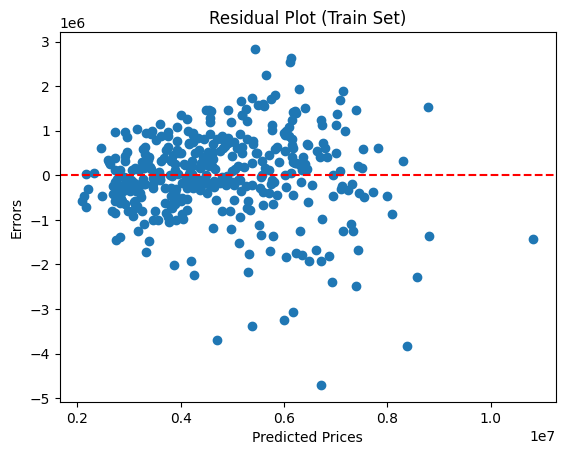

In [69]:
#13  Residual plot - plot y_pred in x axis and errors in y axis
plt.scatter(y_train_pred, train_errors)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot (Train Set)')
plt.xlabel('Predicted Prices')
plt.ylabel('Errors')
plt.show()

In [70]:
#14  Predic on the test set
y_test_pred = model.predict(X_test)
test_errors = y_test_pred - y_test

print(test_errors[:5])  # Show first 5 test set errors


316    1.312313e+06
77     4.192410e+05
360   -6.107092e+05
90    -1.913553e+06
493    4.815736e+05
Name: price, dtype: float64


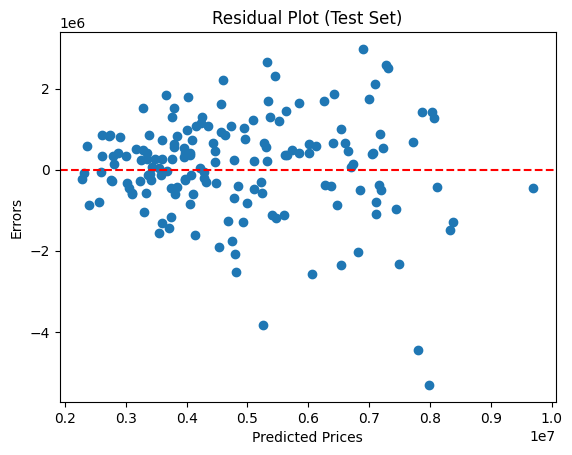

In [71]:
#15 Residual plot - plot y_pred in x axis and errors in y axis
plt.scatter(y_test_pred, test_errors)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot (Test Set)')
plt.xlabel('Predicted Prices')
plt.ylabel('Errors')
plt.show()


In [72]:
#16 Print Mean Squared Error and R Squared Value
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print('Mean Squared Error:', mse)
print('R Squared:', r2)


Mean Squared Error: 1523019469501.2903
R Squared: 0.6463350878895879


In [73]:
#17 Check  Adjusted R Squared Value(by selecting different no of input variables insted of all)
n = len(y_test)  # Number of observations
p = X_train.shape[1]  # Number of features

adj_r2 = 1 - (1-r2) * (n-1) / (n-p-1)
print('Adjusted R Squared:', adj_r2)


Adjusted R Squared: 0.5968714638182016
